<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithm-Performance-Benchmarking/blob/main/Maternal_Health_Risk_Data_Set_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd

df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1014 non-null   float64
 1   SystolicBP  1014 non-null   float64
 2   BS          1014 non-null   float64
 3   HeartRate   1014 non-null   float64
 4   RiskLevel   1014 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.7 KB


In [69]:
df = df.drop(['DiastolicBP', 'BodyTemp'], axis = 1)

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Age', 'SystolicBP', 'BS', 'HeartRate']
df[columns] = scaler.fit_transform(df[columns])

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['RiskLevel'], axis = 1), df['RiskLevel'], test_size = 0.2)

In [87]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1500, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1500, random_state=42)

In [88]:
y_pred = model.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [92]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8916256157635468

In [93]:
matrix = confusion_matrix(y_test,y_pred)

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

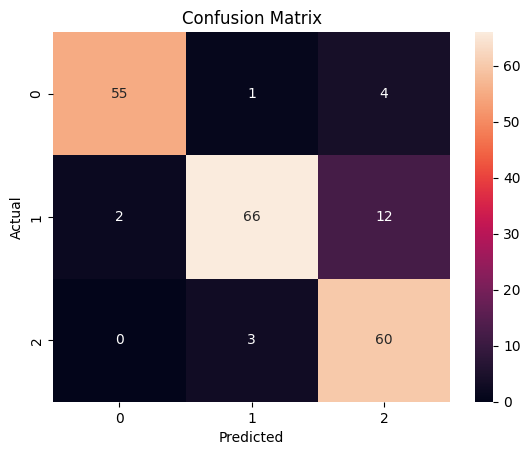

In [98]:
sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()